In [1]:
# Description: This program uses an artificial neural network called Long Short Term Memory(LSTM)
# To predict theclosing stock price of a corperate (Apple.Inc) using the past 60 day stock price

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
#df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data
#df

# new method
import yfinance as yf
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.388994,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.455574,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.593859,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.725513,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.705328,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2019-12-10,65.071663,67.120003,67.517502,66.464996,67.150002,90420400
2019-12-11,65.626686,67.692497,67.775002,67.125000,67.202499,78756800


In [4]:
# Get the number of rows and column in the data set
df.shape

(2002, 6)

In [5]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.388994,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.455574,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.593859,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.725513,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.705328,15.061786,15.276786,15.048214,15.196429,394024400


In [6]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [7]:
df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,12.388994,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.455574,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.593859,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.725513,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.705328,15.061786,15.276786,15.048214,15.196429,394024400


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

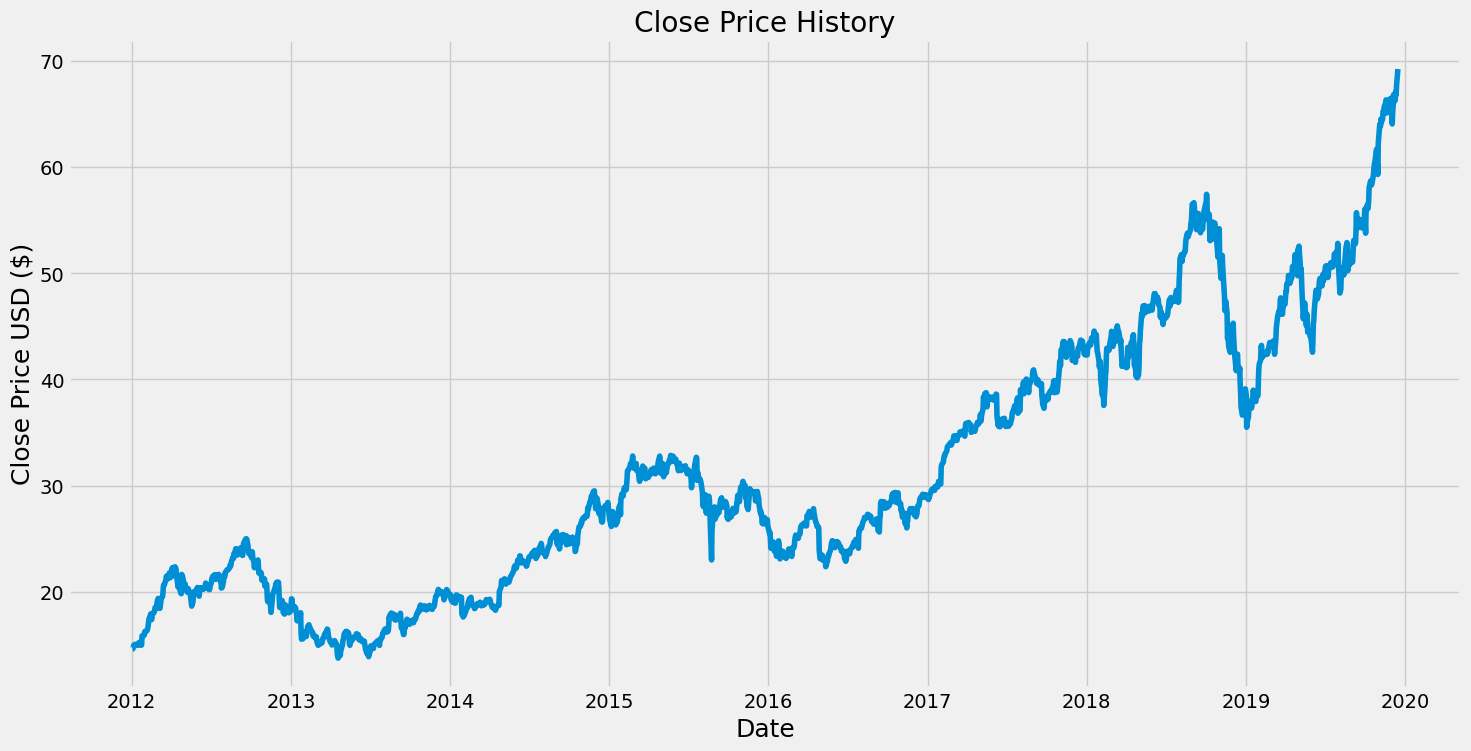

In [9]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# create a new data frame only the close column

data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1602

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,12.388994,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.455574,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.593859,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.725513,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.705328,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2019-12-10,65.071663,67.120003,67.517502,66.464996,67.150002,90420400
2019-12-11,65.626686,67.692497,67.775002,67.125000,67.202499,78756800
2019-12-12,65.793915,67.864998,68.139999,66.830002,66.945000,137310400


In [12]:
dataset
print(dataset)

[[14.6071434 ]
 [14.61714268]
 [14.73821354]
 ...
 [66.83000183]
 [67.73249817]
 [69.24500275]]


In [13]:
data

,Close
Date,
2012-01-03,14.607143
2012-01-04,14.617143
2012-01-05,14.738214
2012-01-06,14.972143
2012-01-09,15.048214
...,...
2019-12-10,66.464996
2019-12-11,67.125000
2019-12-12,66.830002


In [14]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01538207],
       [0.01556226],
       [0.01774405],
       ...,
       [0.95647975],
       [0.97274346],
       [1.        ]])

In [15]:
# create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01538207, 0.01556226, 0.01774405, 0.02195965, 0.02333051,
       0.02342704, 0.02201757, 0.02165715, 0.02159923, 0.0243667 ,
       0.02651634, 0.02665149, 0.02230074, 0.02394194, 0.02217204,
       0.03773428, 0.03735457, 0.03776004, 0.03880266, 0.04374549,
       0.04534165, 0.04433119, 0.04534808, 0.04704719, 0.05115333,
       0.05444857, 0.06143807, 0.06658042, 0.07207677, 0.07523686,
       0.07194805, 0.06534472, 0.07414273, 0.07660129, 0.07978709,
       0.08006385, 0.08594637, 0.08442747, 0.09058672, 0.09692618,
       0.09890202, 0.10131551, 0.09068324, 0.08438884, 0.08894553,
       0.09462209, 0.10169525, 0.10419884, 0.10983034, 0.12247708,
       0.12450444, 0.12415045, 0.13126224, 0.1328262 , 0.13921715,
       0.13543276, 0.13470549, 0.13525901, 0.14220988, 0.14494517])]
[0.14296290043147797]



In [16]:
# convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# compatible the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Traing the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0013


In [21]:
# create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [22]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [23]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
# get the model predict price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [25]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.7766175556182862

<ipython-input-26-3d9c23901f35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


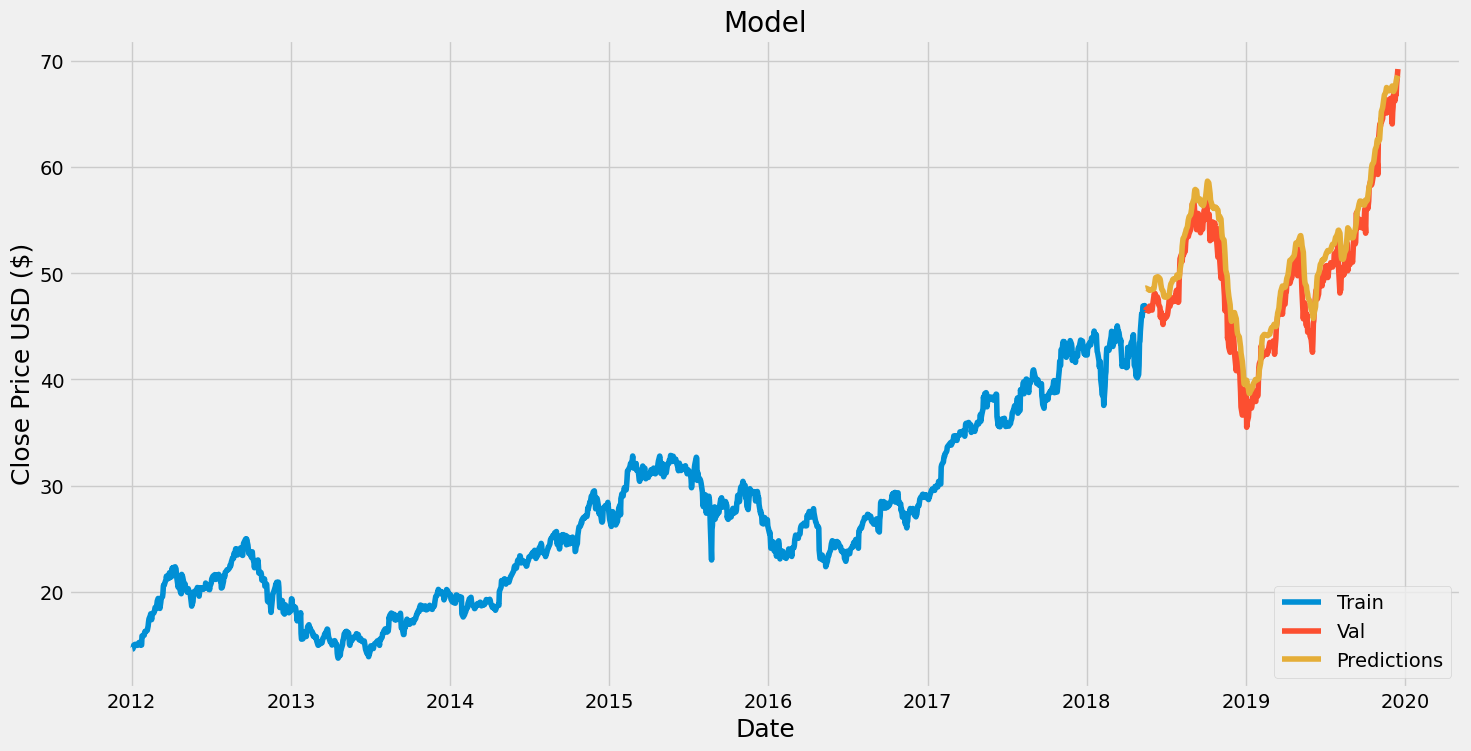

In [26]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,46.500000,48.597610
2018-05-17,46.590000,48.607731
2018-05-18,46.532501,48.582508
2018-05-21,46.727501,48.530178
2018-05-22,46.695000,48.506615
...,...,...
2019-12-10,66.464996,67.587814
2019-12-11,67.125000,67.796852
2019-12-12,66.830002,68.090759


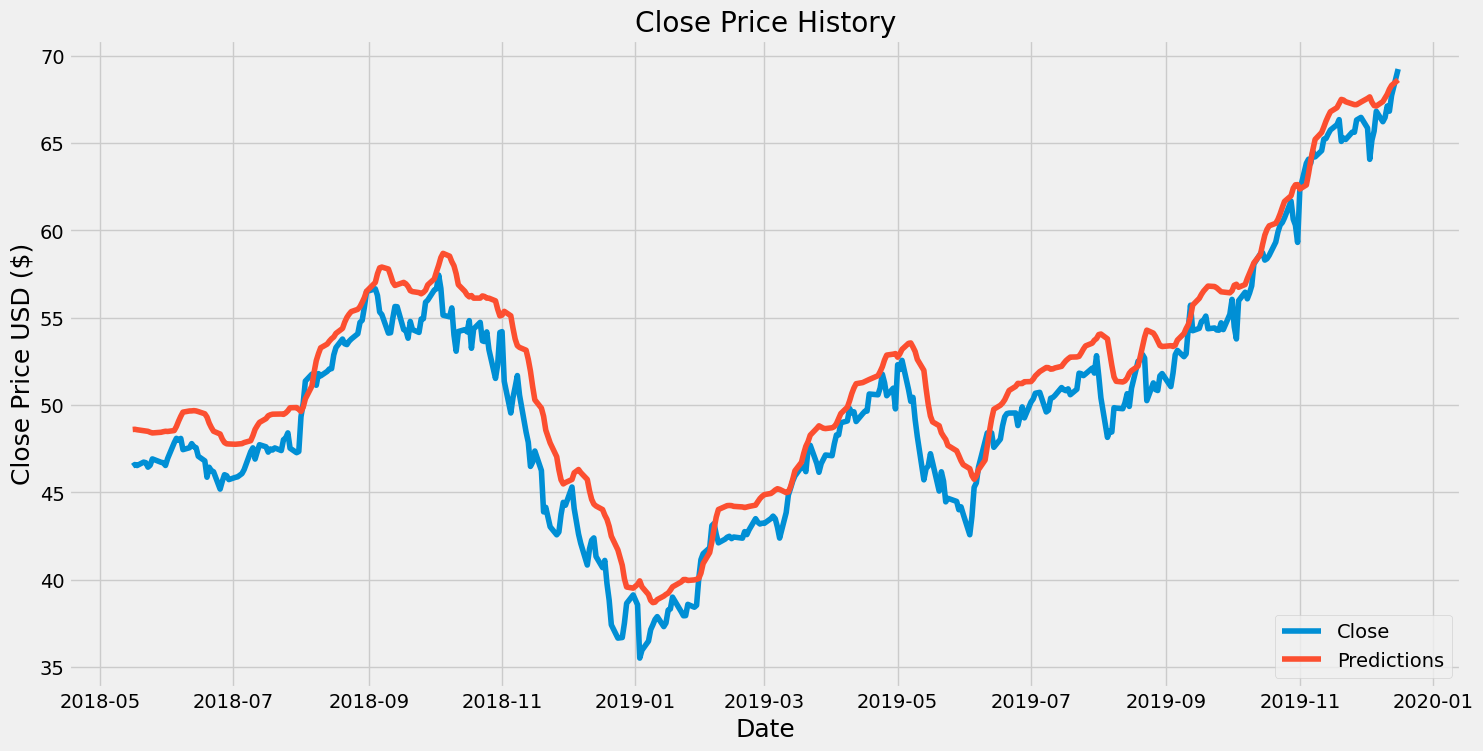

In [30]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Close', 'Predictions'], loc='lower right')
plt.show()

In [34]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
# create a new dataframe

apple_quote.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

new_df = apple_quote.filter(['Close'])

#get the last 60 day closing price value and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled  = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[69.19813]]


In [44]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2019-12-17', end='2019-12-18')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker           AAPL
Date                 
2019-12-17  70.102501
